<a href="https://colab.research.google.com/github/LongNguyen1984/DeepLearning/blob/master/Chapter5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)




In [148]:
# Change the Model from Linear w*X + b to quaratic model w2*X^2 + w1*X + b 
def model(t_u, w2, w1, b):
  return w2*t_u**2 + w1*t_u + b

def loss_fn(t_p, t_c):
  squared_diffs = (t_p - t_c)**2
  return squared_diffs.mean()

w2 = torch.ones(())
w1 = torch.ones(())
b = torch.zeros(())

t_p = model(t_u, w2, w1, b)
t_p






tensor([1310.1901, 3180.7100, 3445.4399, 6789.5103, 3225.9900, 2440.1101,
        1183.1101,  497.0399, 2390.9600, 3708.5601, 4746.9600])

In [130]:
loss = loss_fn(t_p, t_c)
loss

tensor(11709471.)

In [0]:
delta = 0.1

loss_rate_of_change_w2 = \
(loss_fn(model(t_u, w2 + delta, w1, b),t_c)- loss_fn(model(t_u, w2 - delta, w1, b), t_c))/(2.0*delta)

In [0]:
learning_rate = 1e-2
w2 = w2- learning_rate*loss_rate_of_change_w2


In [0]:
loss_rate_of_change_w1 = \
(loss_fn(model(t_u, w2, w1 + delta, b),t_c)- loss_fn(model(t_u, w2, w1 - delta, b), t_c))/(2.0*delta)

w1 = w1- learning_rate*loss_rate_of_change_w1

In [0]:

loss_rate_of_change_b = \
(loss_fn(model(t_u, w2, w1, b + delta),t_c)- loss_fn(model(t_u, w2, w1, b - delta), t_c))/(2.0*delta)

b = b - learning_rate * loss_rate_of_change_b


In [0]:
# Modified formular to compute gradient function
def dloss_fn(t_p, t_c):
  dsq_diffs = 2*(t_p - t_c)/t_p.size(0)
  return dsq_diffs

def dmodel_db(t_u, w2, w1, b):  
  return 1.0
#*************** include this********
def dmodel_dw2(t_u, w2, w1, b):
  return t_u**2

def dmodel_dw1(t_u, w2, w1, b):
  return t_u

def grad_fn(t_u, t_c, t_p, w2, w1, b):
  dloss_dtp = dloss_fn(t_p, t_c)
  dloss_dw2 = dloss_dtp*dmodel_dw2(t_u, w2, w1, b)#*********
  dloss_dw1 = dloss_dtp*dmodel_dw1(t_u, w2, w1, b)#*********
  dloss_db = dloss_dtp*dmodel_db(t_u, w2, w1, b)#***********
  return torch.stack([dloss_dw2.sum(), dloss_dw1.sum(), dloss_db.sum()])#**********


In [0]:
import torch
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
  for epoch in range (1, n_epochs + 1):

    if params.grad is not None:
      params.grad.zero_()

    t_p = model(t_u, *params)
    loss = loss_fn(t_p, t_c)
    loss.backward()

    with torch.no_grad():
      params -= learning_rate * params.grad
   
    
    if epoch % 500 == 0:
      print('Epoch %d, Loss %f' % (epoch, float(loss)))
    #w2, w1, b = params
    #t_p = model(t_u, w2, w1, b)#***********
    #grad = grad_fn(t_u, t_c, t_p, w2, w1, b)#************
    #params = params - learning_rate*grad

    #if print_params:
    #  print('Epoch %d, Loss %f '% (epoch, float(loss)))
  return params


In [0]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)


In [166]:
params.grad is None

True

In [176]:

training_loop(
    n_epochs = 100,
    learning_rate = 1e-4,
    params = torch.tensor([1.0, 1.0, 0.0], requires_grad= True),
    t_u = t_u,
    t_c = t_c
    )


tensor([nan, nan, nan], requires_grad=True)

In [192]:
t_un = t_u*0.01 
params = training_loop(
  n_epochs = 5000,
  learning_rate = 1e-2,
  #params = torch.tensor([1.0, 1.0, 0.0]),
  params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True),
  t_u = t_un,
  t_c = t_c
)
params

Epoch 500, Loss 26.266182
Epoch 1000, Loss 12.949670
Epoch 1500, Loss 6.968258
Epoch 2000, Loss 4.281574
Epoch 2500, Loss 3.074787
Epoch 3000, Loss 2.532740
Epoch 3500, Loss 2.289263
Epoch 4000, Loss 2.179900
Epoch 4500, Loss 2.130779
Epoch 5000, Loss 2.108713


tensor([ 27.9050,  24.3412, -10.3017], requires_grad=True)

## After training, Loss is reduce a little (2.108) vs (2.92.7)

---







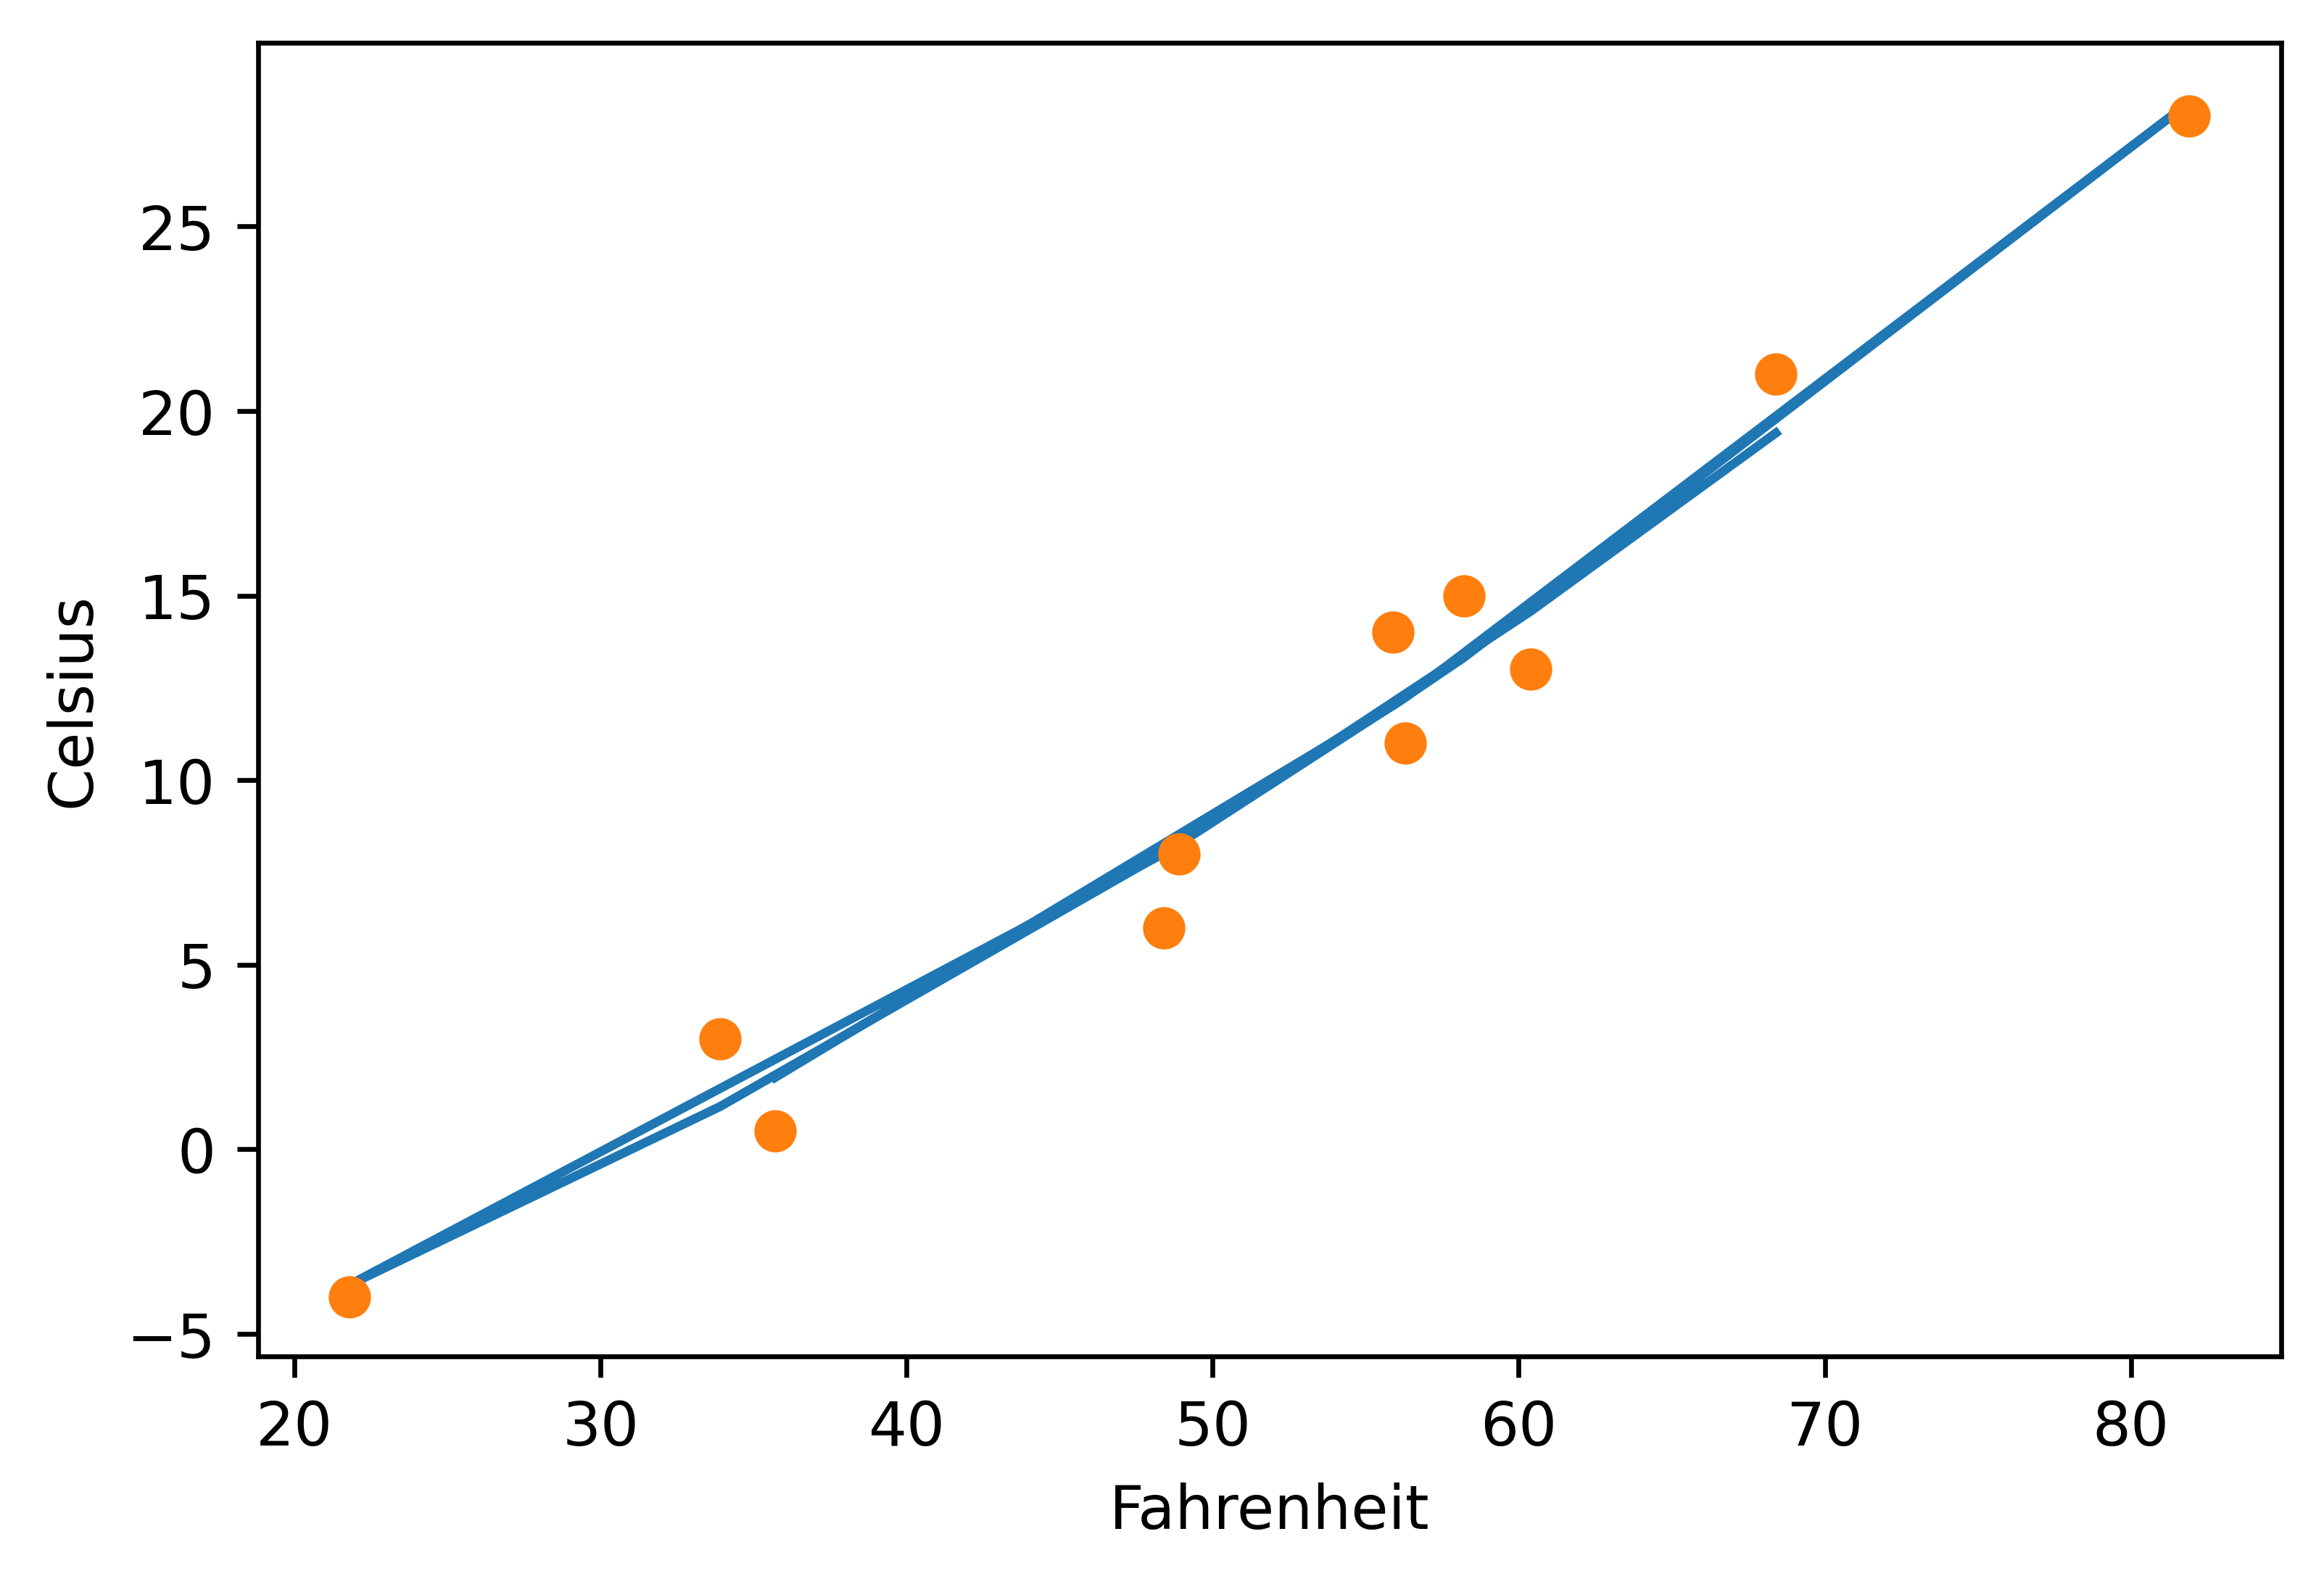

In [196]:
# In[22]:
%matplotlib inline
from matplotlib import pyplot as plt
t_p = model(t_un, *params)
fig = plt.figure(dpi=600)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')

In [194]:
t_u.numpy(), t_c.numpy(), t_p.detach()

(array([35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4],
       dtype=float32),
 array([ 0.5, 14. , 15. , 28. , 11. ,  8. ,  3. , -4. ,  6. , 13. , 21. ],
       dtype=float32),
 tensor([ 1.9446, 12.0248, 13.3170, 28.3513, 12.2474,  8.2738,  1.1569, -3.6691,
          8.0164, 14.5806, 19.4032]))